**Downloading the data** <br>
use the soildata package from https://github.com/CROCUS-Urban/ATMOS484 as: <br>

data = soildata() <br>
CSV.write("soildata_output.csv", data)

In [24]:
import numpy as np
import pandas as pd
import time
from datetime import timedelta, date
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")

In [25]:
# Read the data to plot
data = pd.read_csv('soildata_output.csv',parse_dates=['datetime'],index_col=['datetime'])
data_SM = data.iloc[:,0:64]
data_SM_daily = data_SM.resample('D').mean()
data_ST = data.iloc[:,65:-1]
data_ST_daily = data_ST.resample('D').mean()

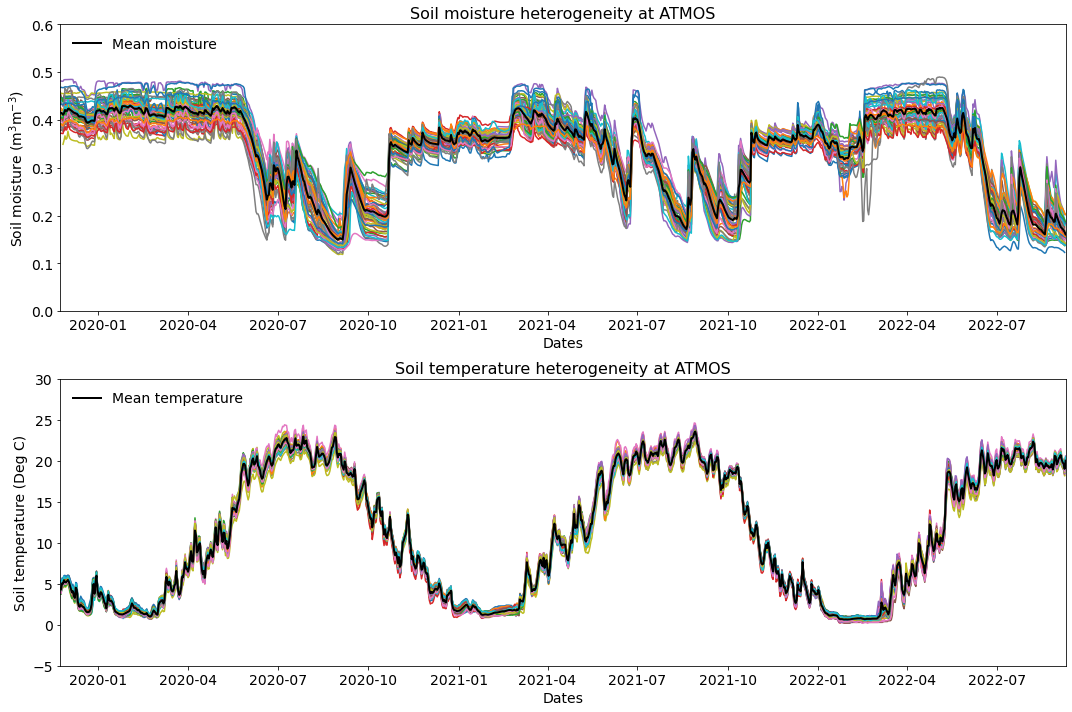

In [27]:
fig,ax1 = plt.subplots(nrows=2,ncols=1,figsize=(15,10))
ax = ax1[0]
ax.plot(data_SM_daily.index,data_SM_daily)
ax.plot(data_SM_daily.index,data_SM_daily.apply(pd.Series.describe, axis=1)['mean'],color='black', label = 'Mean moisture', lw=2)
#ax.fill_between(data_SM_daily.index,data_SM_daily.apply(pd.Series.describe, axis=1)['25%'],data_SM_daily.apply(pd.Series.describe, axis=1)['75%'],color='black',alpha=0.4)
ax.set_xlabel('Dates', fontsize =14)
ax.set_ylabel('Soil moisture ($\mathrm{m}^{3}$$\mathrm{m}^{-3}$)', color='black', fontsize =14)
ax.set_xlim([data_SM_daily.index[0],data_SM_daily.index[-22]])
ax.set_ylim([0,0.6])
ax.set_title('Soil moisture heterogeneity at ATMOS', fontsize =16)
ax.legend(loc = 'upper left', frameon=False, fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)

ax = ax1[1]
ax.plot(data_ST_daily.index,data_ST_daily)
ax.plot(data_ST_daily.index,data_ST_daily.apply(pd.Series.describe, axis=1)['mean'],color='black',label='Mean temperature',lw =2)
#ax.fill_between(data_ST_daily.index,data_ST_daily.apply(pd.Series.describe, axis=1)['25%'],data_ST_daily.apply(pd.Series.describe, axis=1)['75%'],color='black',alpha=0.4)
ax.set_xlabel('Dates', fontsize =14)
ax.set_ylabel('Soil temperature (Deg C)', color='black', fontsize =14)
ax.legend(loc = 'upper left', frameon=False, fontsize=14)
ax.set_ylim([-5,30])
ax.set_xlim([data_ST_daily.index[0],data_ST_daily.index[-22]])
ax.set_title('Soil temperature heterogeneity at ATMOS', fontsize =16)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('Soildata_ATMOS.png', dpi=300)